# Sentiment Analysis

## 1. Import Dataset
Now we will read the .csv file which contains data and the sentiments

In [82]:
import pandas as pd # pandas libray to use some fuctions to read data or extract files

In [83]:
data = pd.read_csv("data_train.csv") # reading file containing reviews and sentiments

features = data.Text
labels = data.Emotion

class_names = ['joy', 'sadness', 'neutral', 'fear', 'anger']

print('size of training set: ', len(data))
print(data.Emotion.value_counts)

data.head()

size of training set:  7934
<bound method IndexOpsMixin.value_counts of 0       neutral
1       sadness
2          fear
3          fear
4         anger
         ...   
7929    sadness
7930      anger
7931    sadness
7932       fear
7933      anger
Name: Emotion, Length: 7934, dtype: object>


,Emotion,Text
0,neutral,There are tons of other paintings that I thin...
1,sadness,"Yet the dog had grown old and less capable , a..."
2,fear,When I get into the tube or the train without ...
3,fear,This last may be a source of considerable disq...
4,anger,She disliked the intimacy he showed towards so...


## 2. Text Representation

Now we will look into data as we can see that the just contains more than just letter and numbers. So we will now convert the reviews to a a regular expression and we will simultaneously convert it into the matrix containing token counts.

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# To convert the content into a regular expression only containg letter and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')

# Using CountVectorizer to convert the reviews in token counts
tv = TfidfVectorizer(tokenizer=token.tokenize, lowercase = True, ngram_range = (1, 2))
features_vect = tv.fit_transform(features)

print(features_vect.shape)
features_vect

(7934, 64135)


<7934x64135 sparse matrix of type '<class 'numpy.float64'>'
	with 230740 stored elements in Compressed Sparse Row format>

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    
    # Set size
    fig.set_size_inches(12.5, 7.5)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.grid(False)
    
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## 3. Splitting data

In [86]:
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features_vect, labels, train_size = 0.4, random_state = 42)

## 4. Training Model

### Logistic Regression
To classify the sentiments to be 0 or 1 (+ve or -ve).


Accuracy: 60.93%


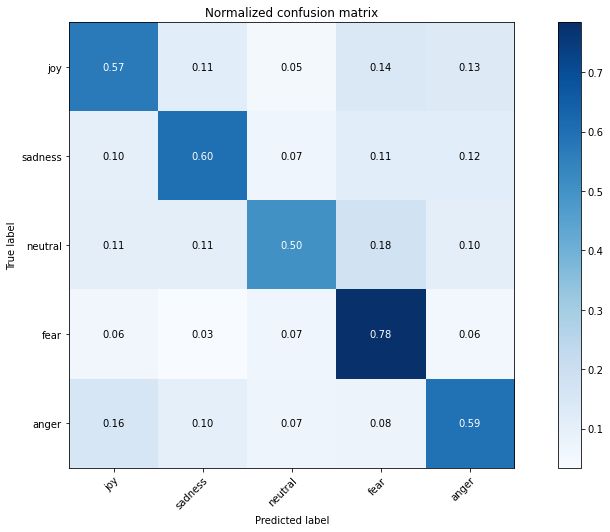

In [87]:
from sklearn.linear_model import LogisticRegression # Using Logistic Regression to classify the data set

lr = LogisticRegression(random_state=0, max_iter=2000)
lr.fit(features_train, labels_train)

pred1 = lr.predict(features_test)

acc = accuracy_score(pred1, labels_test)
print("Accuracy: {:.2f}%".format(acc * 100))

plot_confusion_matrix(labels_test, pred1, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

### Support Vector Classifier

Accuracy: 63.31%


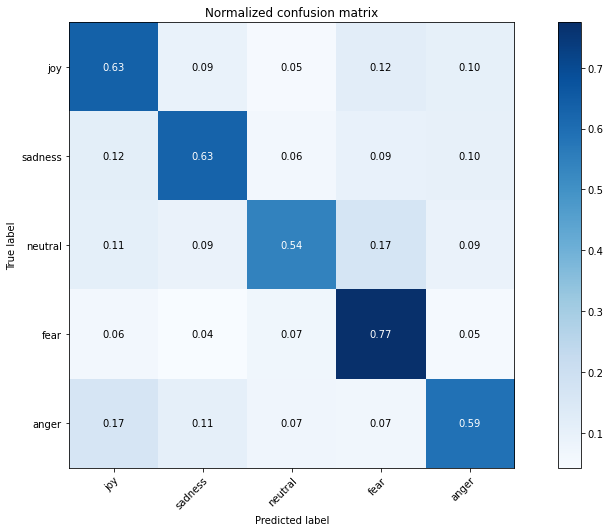

In [88]:
from sklearn.svm import SVC

svc = SVC(kernel = "linear", tol=1e-05)
svc.fit(features_train, labels_train)

pred2 = svc.predict(features_test)

acc = accuracy_score(pred2, labels_test)
print("Accuracy: {:.2f}%".format(acc * 100))

plot_confusion_matrix(labels_test, pred2, classes=class_names, normalize=True, title='Normalized confusion matrix')
plt.show()

## 4. Saving the best Model

In [89]:
from sklearn.pipeline import Pipeline

svm_model = Pipeline([
    ('tfidf', tv),
    ('clf', svc),
])

In [90]:
import pickle

filename="tdidf_svm.sav"
pickle.dump(svm_model, open(filename, "wb"))

## 5. Predicting Data based on model

In [91]:
clf = pickle.load(open(filename, 'rb'))

In [92]:
def fun():
    pred_data = entry.get()
#     print(pred_data)
    
    res = clf.predict([pred_data])
    tk.messagebox.showinfo("Command", res)

In [93]:
import tkinter as tk
window = tk.Tk()
window.geometry("200x100")
label = tk.Label(text="Enter your sentence")
entry = tk.Entry()
label.pack()
entry.pack()

In [94]:
b1 = tk.Button(text="click", command=fun)
b1.pack()
window.mainloop()